In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

vantage1 = pd.read_csv('/content/drive/My Drive/VantageAgora/Sample1.CSV', encoding = "ISO-8859-1")
vantage2 = pd.read_csv('/content/drive/My Drive/VantageAgora/Sample2.CSV', encoding = "ISO-8859-1")

print(vantage1.shape)
print(vantage2.shape)

#print(vantage1.describe())
#print(vantage2.describe())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,32,33,42,63,66,72,76,128,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(12417, 147)
(44643, 146)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,20,32,33,63,91,125,126,127,128,130,133,136,139,145) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We can actually reduce it to the columns that are useful for prediction, and make sure to leave out the ones we found to be null earlier. We have retained some columns that are not predictive/predictable but provide identifying information.

In [0]:
useful_cols1 = ['CLMNO', 'OCCURRENCE', 'CLNTNO', 'NET_INDEMNITY_RESERVE', 'NET_EXPENSE_RESERVE', 'CARRIERCLMNO', 'CLIENTSCLMNO', 'LOSSDATE', 'STATUS', 'OPENDATE', 'CLOSEDATE', 'REOPENDATE', 'LOB', 'COVERAGE', 'STATE', 'DESCR', 'DESCR2', 'INJURIES', 'IPOLNO', 'IEFFDT', 'IEXPDT', 'CCITY', 'CSTATE',  'CGENDER', 'LOCDESC', 'LOC', 'LOCNM', 'LOCCITY', 'LOCSTATE', 'LOCZIP', 'VINNO', 'AUTOMAKE', 'VEHYEAR', 'DRIVERAGE', 'LICSTATE', 'DOB', 'INDRESERVES', 'MEDRESERVES', 'EXPRESERVES', 'TOTALRESERVES', 'INDPAID', 'MEDPAID', 'EXPPAID', 'YORKPAID', 'TOTALPAID', 'RECOVERIES', 'INCURRED', 'AWM_Cause_Code', 'Deductible']
#the second set includes the non-null CAUSE column and does not include Deductible (that column does not exist in the second dataset)
useful_cols2 = ['CLMNO', 'OCCURRENCE', 'CLNTNO', 'NET_INDEMNITY_RESERVE', 'NET_EXPENSE_RESERVE', 'CARRIERCLMNO', 'CLIENTSCLMNO', 'LOSSDATE', 'STATUS', 'OPENDATE', 'CLOSEDATE', 'REOPENDATE', 'LOB', 'COVERAGE', 'STATE', 'DESCR', 'DESCR2', 'INJURIES', 'IPOLNO', 'IEFFDT', 'IEXPDT', 'CCITY', 'CSTATE',  'CGENDER', 'LOCDESC', 'LOC', 'LOCNM', 'LOCCITY', 'LOCSTATE', 'LOCZIP', 'VINNO', 'AUTOMAKE', 'VEHYEAR', 'DRIVERAGE', 'LICSTATE', 'DOB', 'INDRESERVES', 'MEDRESERVES', 'EXPRESERVES', 'TOTALRESERVES', 'INDPAID', 'MEDPAID', 'EXPPAID', 'YORKPAID', 'TOTALPAID', 'RECOVERIES', 'INCURRED', 'AWM_Cause_Code', 'CAUSE']

In [0]:
vantage1 = vantage1[useful_cols1]
vantage2 = vantage2[useful_cols2]

Now we check for duplicates and remove them, keeping only the first occurrence.

In [0]:
vantage1.drop_duplicates(keep='first', inplace=True)
vantage2.drop_duplicates(keep='first', inplace=True)

Now we check how sparse our columns are and plot their distributions. We will first focus on the larger dataset, vantage2.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


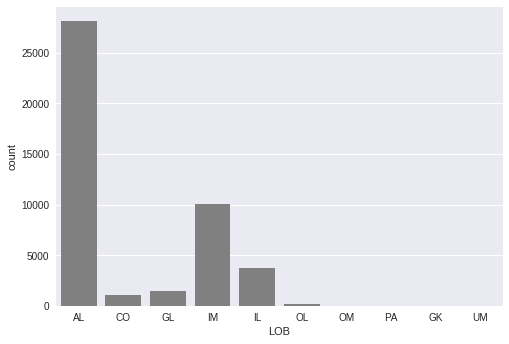

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.countplot(vantage2['LOB'], color='gray')

As we are focusing on cars and drivers, we need only AL (automobile liability) data.

There are 3 state-related columns. We check how similar they are:

In [0]:
license_state = list(vantage2['LICSTATE'])
#state of the license
acc_loc_state = list(vantage2['LOCSTATE'])
#state where the accident took place
state = list(vantage2['STATE'])
#state

def equality_checker(list1, list2):
  equal_count = 0
  for i in range(len(list1)):
    if list1[i] == list2[i]:
      equal_count += 1
  return equal_count/len(list1)

print(equality_checker(license_state, acc_loc_state))
print(equality_checker(state, acc_loc_state))
print(equality_checker(license_state, state))

0.30164144105734386
0.7080579833724152
0.28437433383073973


Disregarding the STATE column, and seeing that LICSTATE and LOCSTATE often have different values, we will analyze both LICSTATE and LOCSTATE separately

In [0]:
state_list = ['AK','AL','AR','AZ','CA','CO','CT','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY']
northeast = ['CT','ME','MA','NH','NJ','NY','PA','RI','VT']
midwest = ['IA','IL','IN','KS','MI','MN','MO','NE','ND','OH','SD','WI']
west = ['AK','AZ','CA','CO','HI','ID','MT','NV','NM','OR','UT','WA','WY']
south = sorted(list(set(state_list) - set(northeast) - set(west) - set(midwest)))
print(south)

['AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']


The INCURRED value is what we have to compare between states and regions. We will first get a list of the incurred values for every state. (LOCSTATE, which is where the accident occurred.)

In [0]:
import statistics
state_incurred = list(zip(list(vantage2['LOCSTATE']), list(vantage2['INCURRED'])))
incurred_list = []

for s in state_list:
  incurred_list_for_s =  [x[1] for x in state_incurred if x[0] == s]
  incurred_list.append(incurred_list_for_s)

Now we print the state name along with the mean, median, and standard deviation of incurred values, sorted by mean.

In [0]:
mean_med_sd = []
#contains those three values for each state
for i in range(len(state_list)):
  mean_incurred = statistics.mean(incurred_list[i])
  med_incurred = statistics.median(incurred_list[i])
  sd_incurred = statistics.stdev(incurred_list[i])
  count = len(incurred_list[i])
  mean_med_sd.append([mean_incurred, med_incurred, sd_incurred, count])
  

state_stats = list(zip(state_list, mean_med_sd))

saved_state_stats = state_stats

print(state_stats[:5])

[('AK', [688681.6578947369, 324405.0, 1980850.5344155834, 38]), ('AL', [610384.5714285715, 290070.0, 1405191.6094743947, 140]), ('AR', [556345.5294117647, 216844, 1396937.96805917, 187]), ('AZ', [604635.707368421, 242064, 1948426.3331087725, 475]), ('CA', [655591.7337837837, 228288.5, 2950097.193365687, 4440])]


In [0]:
state_stats = sorted(state_stats, key = lambda x: x[1][0], reverse = True)
#ordering the states from highest mean INCURRED value to lowest
print("STATE \t MEAN_INCURRED \t MEDIAN \t STDEV\t\t COUNT")
for s in state_stats:
  print(s[0], "\t", round(s[1][0],2), "\t", s[1][1], "\t", round(s[1][2],2), "\t", s[1][3])

STATE 	 MEAN_INCURRED 	 MEDIAN 	 STDEV		 COUNT
UT 	 2226481.31 	 182120 	 22648945.02 	 251
NM 	 1411020.16 	 251200 	 9773176.36 	 103
LA 	 1383181.59 	 337820 	 5198733.28 	 339
NH 	 1307742.91 	 355166 	 3609290.49 	 65
SC 	 1106150.34 	 188766.0 	 7216204.38 	 288
FL 	 1088425.23 	 145075.5 	 5654858.21 	 1932
CO 	 1008881.66 	 196512.0 	 5082154.77 	 634
WA 	 1006544.94 	 250000 	 8690582.07 	 507
GA 	 990194.0 	 284065 	 4816461.59 	 603
NY 	 947545.86 	 194923 	 4525594.11 	 3571
KS 	 935032.81 	 251593.0 	 3958471.55 	 188
DE 	 871002.97 	 253374 	 4769904.37 	 119
TX 	 833695.35 	 245258.0 	 4576663.99 	 2126
KY 	 809188.29 	 148341 	 5758258.5 	 429
MS 	 795777 	 170493.5 	 2203144.51 	 80
PA 	 763890.42 	 233315.5 	 4420183.12 	 1294
MI 	 758895.09 	 163000 	 5111653.43 	 1225
RI 	 755627.72 	 253630.0 	 1372970.82 	 40
NJ 	 736658.39 	 248006.0 	 2764512.49 	 1144
IN 	 711407.9 	 243695 	 2985117.46 	 309
CT 	 707169.31 	 145107 	 3616032.64 	 765
VA 	 689498.85 	 224100 	 

Since high values can skew the mean, the median value may be more representative.

In [0]:
state_stats = sorted(state_stats, key = lambda x: x[1][1], reverse = True)
#ordering the states from highest median INCURRED value to lowest
print("STATE \t MEAN_INCURRED \t MEDIAN \t STDEV\t\t COUNT")
for s in state_stats:
  print(s[0], "\t", round(s[1][0],2), "\t", s[1][1], "\t", round(s[1][2],2), "\t", s[1][3])

STATE 	 MEAN_INCURRED 	 MEDIAN 	 STDEV		 COUNT
SD 	 506090.14 	 445240 	 490800.44 	 7
MN 	 516601.23 	 355259.5 	 607926.17 	 86
NH 	 1307742.91 	 355166 	 3609290.49 	 65
LA 	 1383181.59 	 337820 	 5198733.28 	 339
AK 	 688681.66 	 324405.0 	 1980850.53 	 38
NV 	 568460.36 	 315294.0 	 947997.03 	 140
OK 	 649588.88 	 295334.0 	 1699909.34 	 184
ME 	 649978.94 	 291264.5 	 1315882.17 	 134
AL 	 610384.57 	 290070.0 	 1405191.61 	 140
GA 	 990194.0 	 284065 	 4816461.59 	 603
MT 	 324751.36 	 257219.5 	 397644.11 	 64
RI 	 755627.72 	 253630.0 	 1372970.82 	 40
DE 	 871002.97 	 253374 	 4769904.37 	 119
KS 	 935032.81 	 251593.0 	 3958471.55 	 188
NM 	 1411020.16 	 251200 	 9773176.36 	 103
WA 	 1006544.94 	 250000 	 8690582.07 	 507
NJ 	 736658.39 	 248006.0 	 2764512.49 	 1144
TX 	 833695.35 	 245258.0 	 4576663.99 	 2126
OR 	 539610.4 	 244698.0 	 900525.02 	 222
IN 	 711407.9 	 243695 	 2985117.46 	 309
AZ 	 604635.71 	 242064 	 1948426.33 	 475
IA 	 635275.15 	 238041.5 	 1591679

It will also be useful to sort by the number of claims:

In [0]:
state_stats = sorted(state_stats, key = lambda x: x[1][3], reverse = True)
#ordering the states from highest median INCURRED value to lowest
print("STATE \t MEAN_INCURRED \t MEDIAN \t STDEV\t\t COUNT")
for s in state_stats:
  print(s[0], "\t", round(s[1][0],2), "\t", s[1][1], "\t", round(s[1][2],2), "\t", s[1][3])

STATE 	 MEAN_INCURRED 	 MEDIAN 	 STDEV		 COUNT
CA 	 655591.73 	 228288.5 	 2950097.19 	 4440
NY 	 947545.86 	 194923 	 4525594.11 	 3571
TX 	 833695.35 	 245258.0 	 4576663.99 	 2126
FL 	 1088425.23 	 145075.5 	 5654858.21 	 1932
PA 	 763890.42 	 233315.5 	 4420183.12 	 1294
VA 	 689498.85 	 224100 	 2632250.36 	 1293
MI 	 758895.09 	 163000 	 5111653.43 	 1225
NJ 	 736658.39 	 248006.0 	 2764512.49 	 1144
MD 	 548112.89 	 226250.0 	 1498095.87 	 804
CT 	 707169.31 	 145107 	 3616032.64 	 765
IL 	 633404.3 	 231000 	 2582823.61 	 717
MA 	 469527.27 	 107448.5 	 1353015.26 	 648
CO 	 1008881.66 	 196512.0 	 5082154.77 	 634
GA 	 990194.0 	 284065 	 4816461.59 	 603
NC 	 488698.84 	 198055.5 	 1204959.05 	 546
WA 	 1006544.94 	 250000 	 8690582.07 	 507
AZ 	 604635.71 	 242064 	 1948426.33 	 475
KY 	 809188.29 	 148341 	 5758258.5 	 429
OH 	 608883.99 	 235164.0 	 1359399.97 	 422
MO 	 551687.79 	 214721.0 	 1425265.36 	 416
LA 	 1383181.59 	 337820 	 5198733.28 	 339
IN 	 711407.9 	 243

Now we look at LICSTATE, which is where the cars are from (not where the accident occurred)

In [0]:
licstate_incurred = list(zip(list(vantage2['LICSTATE']), list(vantage2['INCURRED'])))
lic_incurred_list = []

for s in state_list:
  lic_incurred_list_for_s =  [x[1] for x in licstate_incurred if x[0] == s]
  lic_incurred_list.append(lic_incurred_list_for_s)

In [0]:
lic_mean_med_sd = []
#contains those three values for each state
for i in range(len(state_list)):
  mean_incurred = statistics.mean(lic_incurred_list[i])
  med_incurred = statistics.median(lic_incurred_list[i])
  sd_incurred = statistics.stdev(lic_incurred_list[i])
  count = len(lic_incurred_list[i])
  lic_mean_med_sd.append([mean_incurred, med_incurred, sd_incurred, count])

licstate_stats = list(zip(state_list, lic_mean_med_sd))
print(state_stats[:5])

[('CA', [655591.7337837837, 228288.5, 2950097.193365687, 4440]), ('NY', [947545.8622234669, 194923, 4525594.111673709, 3571]), ('TX', [833695.3457196613, 245258.0, 4576663.989478304, 2126]), ('FL', [1088425.2261904762, 145075.5, 5654858.212794345, 1932]), ('PA', [763890.4188562597, 233315.5, 4420183.116450751, 1294])]


Printing values for LICSTATES, in descending order of mean INCURRED value:

In [0]:
licstate_stats = sorted(licstate_stats, key = lambda x: x[1][0], reverse = True)
#ordering the states from highest mean INCURRED value to lowest
print("LICSTATE \t MEAN \t MEDIAN \t STDEV \t\t COUNT")
for s in licstate_stats:
  print(s[0], "\t", round(s[1][0],2), "\t", s[1][1], "\t", round(s[1][2],2), "\t", s[1][3])

LICSTATE 	 MEAN 	 MEDIAN 	 STDEV 		 COUNT
KY 	 1604498.28 	 206250 	 9552249.74 	 153
SC 	 1562853.27 	 264708.5 	 9759926.62 	 154
DE 	 1474654.8 	 361702 	 7385428.63 	 49
WA 	 1474167.95 	 269117.0 	 12249091.44 	 254
CT 	 1423867.73 	 248825.5 	 7005586.52 	 208
GA 	 1338129.72 	 322040.0 	 6818243.2 	 268
AL 	 1235555.22 	 278439 	 5274148.25 	 79
LA 	 1168670.02 	 327133.5 	 3229853.97 	 170
NY 	 1114699.71 	 199342.0 	 4999569.89 	 1298
MI 	 1086690.52 	 212934 	 8601579.91 	 315
IN 	 1054685.12 	 225907 	 6597856.8 	 171
FL 	 1031810.97 	 159900 	 5779964.6 	 791
AR 	 952423.73 	 269727 	 2249061.65 	 55
AK 	 882807.09 	 349135.5 	 2571049.14 	 22
RI 	 871669.2 	 404550.0 	 1514574.79 	 54
CO 	 822648.95 	 217687 	 4917728.3 	 253
ME 	 817861.81 	 302613 	 1584862.21 	 99
TX 	 756140.54 	 245308 	 2571761.81 	 981
VA 	 749114.65 	 251077.5 	 2748049.54 	 572
NV 	 747037.73 	 217838 	 1719567.16 	 139
MS 	 746301.11 	 163037 	 1601689.67 	 45
NJ 	 733512.37 	 251776.5 	 1643913.

And now in descending order of median value, which may be more representative:

In [0]:
licstate_stats = sorted(licstate_stats, key = lambda x: x[1][1], reverse = True)
#ordering the states from highest median INCURRED value to lowest
print("LICSTATE   MEAN\t\t MEDIAN\t\tSTDEV \t\t COUNT")
for s in licstate_stats:
  print(s[0], "\t", round(s[1][0],2), "\t", s[1][1], "\t", round(s[1][2],2), "\t", s[1][3])

LICSTATE   MEAN		 MEDIAN		STDEV 		 COUNT
SD 	 697600.6 	 531510.0 	 577862.35 	 10
HI 	 522330.33 	 524838 	 175235.96 	 3
RI 	 871669.2 	 404550.0 	 1514574.79 	 54
MO 	 598425.79 	 371071.0 	 880136.11 	 132
DE 	 1474654.8 	 361702 	 7385428.63 	 49
AK 	 882807.09 	 349135.5 	 2571049.14 	 22
MT 	 386799.95 	 331200 	 312921.33 	 19
IA 	 469095.2 	 330330 	 700787.49 	 49
LA 	 1168670.02 	 327133.5 	 3229853.97 	 170
GA 	 1338129.72 	 322040.0 	 6818243.2 	 268
KS 	 727426.35 	 319953 	 1126991.36 	 69
ME 	 817861.81 	 302613 	 1584862.21 	 99
NH 	 657459.14 	 299622.5 	 1012224.05 	 36
AZ 	 627225.05 	 297000 	 1197726.29 	 293
ND 	 297382.14 	 291649 	 215978.09 	 7
AL 	 1235555.22 	 278439 	 5274148.25 	 79
AR 	 952423.73 	 269727 	 2249061.65 	 55
WA 	 1474167.95 	 269117.0 	 12249091.44 	 254
SC 	 1562853.27 	 264708.5 	 9759926.62 	 154
PA 	 576205.05 	 256925 	 1532452.32 	 661
MN 	 591358.22 	 256764.0 	 696822.07 	 18
UT 	 630507.63 	 255904 	 1172377.62 	 67
CA 	 685629.9 	

Now we order them by the number of claims:

In [0]:
licstate_stats = sorted(licstate_stats, key = lambda x: x[1][3], reverse = True)
#ordering the states from highest median INCURRED value to lowest
print("LICSTATE   MEAN\t\t MEDIAN\t\tSTDEV \t\t COUNT")
for s in licstate_stats:
  print(s[0], "\t", round(s[1][0],2), "\t", s[1][1], "\t", round(s[1][2],2), "\t", s[1][3])

LICSTATE   MEAN		 MEDIAN		STDEV 		 COUNT
CA 	 685629.9 	 255896 	 3141611.03 	 1643
NY 	 1114699.71 	 199342.0 	 4999569.89 	 1298
TX 	 756140.54 	 245308 	 2571761.81 	 981
FL 	 1031810.97 	 159900 	 5779964.6 	 791
PA 	 576205.05 	 256925 	 1532452.32 	 661
VA 	 749114.65 	 251077.5 	 2748049.54 	 572
MD 	 535760.07 	 249262.0 	 1067972.47 	 458
NJ 	 733512.37 	 251776.5 	 1643913.05 	 414
MA 	 720504.58 	 178810.0 	 2214092.67 	 332
MI 	 1086690.52 	 212934 	 8601579.91 	 315
AZ 	 627225.05 	 297000 	 1197726.29 	 293
NC 	 671131.88 	 248661.5 	 2094494.93 	 276
GA 	 1338129.72 	 322040.0 	 6818243.2 	 268
WA 	 1474167.95 	 269117.0 	 12249091.44 	 254
CO 	 822648.95 	 217687 	 4917728.3 	 253
IL 	 624705.75 	 247465.0 	 1727008.0 	 252
OH 	 567065.95 	 244283 	 1427297.37 	 209
CT 	 1423867.73 	 248825.5 	 7005586.52 	 208
IN 	 1054685.12 	 225907 	 6597856.8 	 171
LA 	 1168670.02 	 327133.5 	 3229853.97 	 170
SC 	 1562853.27 	 264708.5 	 9759926.62 	 154
KY 	 1604498.28 	 206250 	

For a high-level view, we can group the states into the four standard regions of the US: Northeast, South, West, Midwest. We will be using the LOCSTATE values.

In [0]:
state_incurred = list(zip(list(vantage2['LOCSTATE']), list(vantage2['INCURRED'])))

midwest_incurred_list = [x[1] for x in state_incurred if x[0] in midwest]
northeast_incurred_list = [x[1] for x in state_incurred if x[0] in northeast]
south_incurred_list = [x[1] for x in state_incurred if x[0] in south]
west_incurred_list = [x[1] for x in state_incurred if x[0] in west]

In [0]:
midwest_stats = [round(statistics.mean(midwest_incurred_list),2), statistics.median(midwest_incurred_list), round(statistics.stdev(midwest_incurred_list),2), len(midwest_incurred_list)]
west_stats = [round(statistics.mean(west_incurred_list),2), statistics.median(west_incurred_list), round(statistics.stdev(west_incurred_list),2), len(west_incurred_list)]
south_stats = [round(statistics.mean(south_incurred_list),2), statistics.median(south_incurred_list), round(statistics.stdev(south_incurred_list),2), len(south_incurred_list)]
northeast_stats = [round(statistics.mean(northeast_incurred_list),2), statistics.median(northeast_incurred_list), round(statistics.stdev(northeast_incurred_list),2), len(northeast_incurred_list)]
#mean, median, SD, count
print("\t\t  Mean\t\tMedian\tSD\t  Count")
print("Midwest\t\t:", midwest_stats)
print("West\t\t:", west_stats)
print("South\t\t:", south_stats)
print("Northeast\t:", northeast_stats)

		  Mean		Median	SD	  Count
Midwest		: [664253.82, 214413.5, 3420132.51, 3904]
West		: [764805.15, 228096.5, 5793306.71, 6980]
South		: [838145.81, 219721, 4324375.47, 9373]
Northeast	: [815474.83, 200811, 3943563.92, 7693]


Now looking at the cities where the accidents occurred (LOCCITY)

In [0]:
import numpy
city_incurred = list(zip(list(vantage2['LOCCITY']), list(vantage2['INCURRED']), list(vantage2['LOCSTATE'])))
print("Old count of city_incurred", len(city_incurred))
#including state as well, in case we want to view cities by state
city_incurred = [x for x in city_incurred if x[0] is not numpy.nan and x[0] != '']
print("New count of city_incurred", len(city_incurred))

city_list = [x for x in list(zip(list(vantage2['LOCCITY']), list(vantage2['LOCSTATE']))) if x[0] is not numpy.nan and x[0] != '']
#removing duplicates
def rem_dupes(dup_list): 
    yooneeks = [] 
    for elem in dup_list: 
        if elem not in yooneeks: 
            yooneeks.append(elem) 
    return yooneeks
  
city_list = rem_dupes(city_list)  
print(len(city_list))
print(city_list[:10])
print(city_incurred[:10])

Old count of city_incurred 28146
New count of city_incurred 27967
1428
[('FORT WALTON BEACH', 'FL'), ('LAKELANAD', 'FL'), ('TUCSON', 'AZ'), ('OMAHA', 'NE'), ('SAN DIEGO', 'CA'), ('TAMPA', 'FL'), ('BLOOMINGTON', 'IN'), ('DES MOINES', 'IA'), ('LINCOLN', 'NE'), ('BAYONNE', 'NJ')]
[('FORT WALTON BEACH', 930924, 'FL'), ('LAKELANAD', 0, 'FL'), ('LAKELANAD', 0, 'FL'), ('TUCSON', 471607, 'AZ'), ('OMAHA', 0, 'NE'), ('SAN DIEGO', 0, 'CA'), ('TAMPA', 863641, 'FL'), ('BLOOMINGTON', 222955, 'IN'), ('DES MOINES', 0, 'IA'), ('LINCOLN', 0, 'NE')]


We have 1646 distinct cities (cities in different states with the same name have been accounted for). We need to count claims and calculate their mean and median values.

In [0]:
incurred_list = []
for c in city_list:
  incurred_list_for_c =  [x[1] for x in city_incurred if x[0] == c[0] and x[2] == c[1]]
  #accounting for both city and state values
  incurred_list.append(incurred_list_for_c)

In [0]:
mean_med_sd = []
#contains those three values for each state
for i in range(len(city_list)):
  if len(incurred_list[i]) >= 1:
    mean_incurred = statistics.mean(incurred_list[i])
    med_incurred = statistics.median(incurred_list[i])
  else:
    mean_incurred = 0
    med_incurred = 0
  if len(incurred_list[i]) >= 2:
    sd_incurred = statistics.stdev(incurred_list[i])
  else:
    sd_incurred = 0
  count = len(incurred_list[i])
  mean_med_sd.append([mean_incurred, med_incurred, sd_incurred, count])

city_stats = list(zip(city_list, mean_med_sd))
print(city_stats[:5])

[(('FORT WALTON BEACH', 'FL'), [456935.28571428574, 196989, 649141.4720153183, 21]), (('LAKELANAD', 'FL'), [398314.73529411765, 140475.5, 719077.7439189691, 34]), (('TUCSON', 'AZ'), [550352.5773195876, 251995, 1016613.4661997978, 97]), (('OMAHA', 'NE'), [445217.72222222225, 200506.5, 781669.8183323995, 36]), (('SAN DIEGO', 'CA'), [426396.42253521126, 227992.5, 616615.2496096013, 142])]


Now we order the cities by descending order of claim counts

In [0]:
city_stats = sorted(city_stats, key = lambda x: x[1][3], reverse = True)
#ordering the states from highest count to lowest
print("CITY \t\t\t\t MEAN_INCURRED \t\t MEDIAN \t STDEV\t\t COUNT")
for c in city_stats:
  print(c[0], "\t\t\t", round(c[1][0],2), "\t", c[1][1], "\t", round(c[1][2],2), "\t", c[1][3])

CITY 				 MEAN_INCURRED 		 MEDIAN 	 STDEV		 COUNT
('BRONX', 'NY') 			 896574.9 	 211816.0 	 4407732.7 	 786
('FARMINGTON HILLS', 'MI') 			 663209.8 	 141770.0 	 4804655.35 	 656
('BROOKLYN', 'NY') 			 908932.17 	 175002.0 	 4509352.64 	 574
('NEW YORK', 'NY') 			 847364.52 	 179974 	 2779627.24 	 405
('LOUISVILLE', 'KY') 			 845336.28 	 135074 	 6266814.33 	 359
('ATLANTA', 'GA') 			 869406.18 	 262676 	 3145141.23 	 355
('ELK GROVE VILLAGE', 'IL') 			 776530.47 	 277147.0 	 3583093.98 	 322
('SACRAMENTO', 'CA') 			 703316.2 	 234731 	 2121790.47 	 295
('CARROLLTON', 'TX') 			 654139.05 	 323250.0 	 1025031.39 	 282
('CONCORD', 'CA') 			 934705.86 	 246974 	 6136041.67 	 279
('SAN JOSE', 'CA') 			 628550.51 	 218000 	 3127362.65 	 277
('HOUSTON', 'TX') 			 828561.79 	 210788.5 	 2977780.31 	 252
('LAKELAND', 'FL') 			 1182184.29 	 338253.5 	 3109617.88 	 252
('AUSTIN', 'TX') 			 591600.07 	 253200 	 1205577.97 	 239
('SAN LEANDRO', 'CA') 			 709585.67 	 173358.5 	 2869017.92 	 230
('PH

Now we order the cities in descending order of median claim values 

In [0]:
city_stats = sorted(city_stats, key = lambda x: x[1][1], reverse = True)
#ordering the states from highest median to lowest
print("CITY \t\t\t\t MEAN_INCURRED \t\t MEDIAN \t STDEV\t\t COUNT")
for c in city_stats:
  print(c[0], "\t\t\t", round(c[1][0],2), "\t", c[1][1], "\t", round(c[1][2],2), "\t", c[1][3])

CITY 				 MEAN_INCURRED 		 MEDIAN 	 STDEV		 COUNT
('SAN MARCOS', 'TX') 			 6046865 	 6046865 	 0 	 1
('BOWIE', 'MD') 			 4259561.5 	 4259561.5 	 1477654.48 	 2
('RESEDA', 'CA') 			 3459000 	 3459000 	 0 	 1
('BEDFORD', 'OH') 			 3233767.5 	 3233767.5 	 4572247.91 	 2
('WILLIS', 'TX') 			 2853343 	 2853343 	 0 	 1
('ROCKAWAY', 'NY') 			 2774627 	 2774627.0 	 2995367.96 	 2
('TROY', 'MI') 			 2671684.5 	 2671684.5 	 3499695.61 	 2
('ADA', 'OK') 			 2365642 	 2365642 	 0 	 1
('MIDDLESEX', 'NJ') 			 2257688 	 2257688.0 	 1260934.03 	 2
('PHILLIPSBURG', 'NJ') 			 2247773 	 2247773 	 0 	 1
('BRADENTON', 'FL') 			 2240580 	 2240580 	 0 	 1
('ALAMOGORDO', 'NM') 			 2192194 	 2192194.0 	 1918954.87 	 2
('CORSICANA', 'TX') 			 2100506 	 2100506 	 0 	 1
('SALINA', 'KS') 			 2279138.5 	 2095009.0 	 2031466.75 	 6
('MOUNT PLEASANT', 'TX') 			 2076579 	 2076579.0 	 2598864.91 	 2
('BRUNSWICK', 'OH') 			 2049859.5 	 2049859.5 	 2898939.11 	 2
('SARTELL', 'MN') 			 2013312 	 2013312.0 	 1152543.04 	 2

Ordering by median is actually misleading because cities with a few claims, all of them large, are at the top.

We can also check the top cities in a particular state.

In [0]:
city_stats = sorted(city_stats, key = lambda x: x[1][3], reverse = True)
#ordering the states from highest count to lowest
print("CITY \t\t\t\t MEAN_INCURRED \t\t MEDIAN \t STDEV\t\t COUNT")
for c in city_stats:
  if c[0][1] == 'NY':
    print(c[0], "\t\t\t", round(c[1][0],2), "\t", c[1][1], "\t", round(c[1][2],2), "\t", c[1][3])

CITY 				 MEAN_INCURRED 		 MEDIAN 	 STDEV		 COUNT
('BRONX', 'NY') 			 896574.9 	 211816.0 	 4407732.7 	 786
('BROOKLYN', 'NY') 			 908932.17 	 175002.0 	 4509352.64 	 574
('NEW YORK', 'NY') 			 847364.52 	 179974 	 2779627.24 	 405
('LONG ISLAND CITY', 'NY') 			 947964.21 	 66592 	 5114061.59 	 117
('NEW HYDE PARK', 'NY') 			 1827208.04 	 147850.0 	 5080121.9 	 104
('STATEN ISLAND', 'NY') 			 1114006.01 	 264016.5 	 3757780.76 	 80
('BUFFALO', 'NY') 			 675412.28 	 252267.0 	 1982045.9 	 74
('POUGHKEEPSIE', 'NY') 			 886353.27 	 274116 	 2839740.88 	 71
('PATTERSON', 'NY') 			 2107262.3 	 394496.0 	 10951390.94 	 64
('RIDGEWOOD', 'NY') 			 354044.35 	 179354 	 467658.22 	 55
('MOUNT VERNON', 'NY') 			 3751962.61 	 299241.0 	 13482171.74 	 46
('AMITYVILLE', 'NY') 			 706852.34 	 297211.0 	 975924.43 	 44
('MASPETH', 'NY') 			 637488.89 	 100429.5 	 2478116.76 	 44
('SYRACUSE', 'NY') 			 1253132.8 	 219814 	 5476104.99 	 41
('ROCHESTER', 'NY') 			 452341.25 	 293170.0 	 555998.8 	 40
('R

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# colorscale → This is the color for the geographical map elements

# locations → This is the data for the state abbreviations

# locationmode → This lets plotly know we what nation to use

# z → This is the numerical measurement for each state element; This should be of the same index sequence as the locations argument

# text → This is the categorical value for each element

# colorbar → Title for right side bar

Now we plot the number of claims per LOCSTATE on a map of the US

In [0]:
py.sign_in('ploot', 'iQYvb7UkqZR57cwBaCv8')
claim_counts = []
for i in range(len(state_list)):
  claim_counts.append(saved_state_stats[i][1][3])
  
print(claim_counts)
  
median_claims = []
for i in range(len(state_list)):
  median_claims.append(saved_state_stats[i][1][1])

print(median_claims)

data = [dict(
    type="choropleth",
    autocolorscale= True,
    locations = state_list,
    z = claim_counts,
    locationmode = 'USA-states',
    text = state_list,
    marker = dict(
    line = dict (
    color = 'rgb(255,255,255)',
    width = 2
 )),
    colorbar = dict(title = "Number of claims per state")
)]

layout = dict(title = "Number of claims per state",
        geo=dict(scope="usa",showlakes = True,lakecolor = 'rgb(255, 255, 255)'))

py.iplot(go.Figure(data=data,layout=layout),validate=False)

[38, 140, 187, 475, 4440, 634, 765, 119, 1932, 603, 11, 136, 79, 717, 309, 188, 429, 339, 648, 804, 134, 1225, 86, 416, 80, 64, 546, 22, 71, 65, 1144, 103, 140, 3571, 422, 184, 222, 1294, 40, 288, 7, 270, 2126, 251, 1293, 32, 507, 305, 33, 16]
[324405.0, 290070.0, 216844, 242064, 228288.5, 196512.0, 145107, 253374, 145075.5, 284065, 157928, 238041.5, 130000, 231000, 243695, 251593.0, 148341, 337820, 107448.5, 226250.0, 291264.5, 163000, 355259.5, 214721.0, 170493.5, 257219.5, 198055.5, 165284.5, 196549, 355166, 248006.0, 251200, 315294.0, 194923, 235164.0, 295334.0, 244698.0, 233315.5, 253630.0, 188766.0, 445240, 213366.5, 245258.0, 182120, 224100, 184865.0, 250000, 184044, 135771, 154156.0]


In [0]:
data = [dict(
    type="choropleth",
    autocolorscale= True,
    locations = state_list,
    z = median_claims,
    locationmode = 'USA-states',
    text = state_list,
    marker = dict(
    line = dict (
    color = 'rgb(255,255,255)',
    width = 2
 )),
    colorbar = dict(title = "Median claim value per state")
)]

layout = dict(title = "Median claim value per state",
        geo=dict(scope="usa",showlakes = True,lakecolor = 'rgb(255, 255, 255)'))

py.iplot(go.Figure(data=data,layout=layout),validate=False)